<a href="https://colab.research.google.com/github/ayasherby/content/blob/main/ROI_mouth_(Grad).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Step 1: Setup Your Colab Environment**

# **Step 2: Install Required Libraries**

In [1]:
!pip install facenet-pytorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

# **Step 3: Import Libraries**


In [2]:
from facenet_pytorch import MTCNN
import torch
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# **Step 4: Load and Display Your Image**

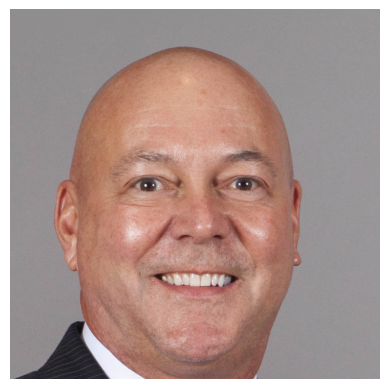

In [108]:
# Load an image from a local file
image_path = '/content/01025.png'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# **Step 5: Detect Faces and Facial Landmarks**


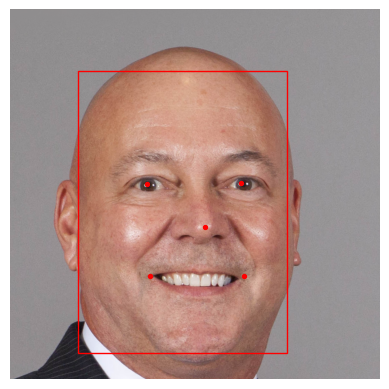

In [109]:
# Initialize MTCNN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device)

# Detect faces and landmarks
boxes, probs, landmarks = mtcnn.detect(image, landmarks=True)

# Visualize the detection (optional)
fig, ax = plt.subplots()
ax.imshow(image)
if boxes is not None:
    for box, landmark in zip(boxes, landmarks):
        ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c='red')
        rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, color='red')
        ax.add_patch(rect)
plt.axis('off')
plt.show()

# **Step 6: Crop the Mouth Region**

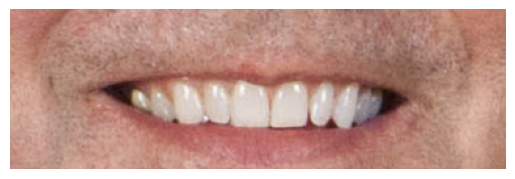

In [110]:
if landmarks is not None:
    margin = 60  # Adjust based on your needs
    mouth_landmarks = landmarks[0][3:5]  # Assuming landmarks for the first detected face
    mouth_box = [
        min(mouth_landmarks[:,0]) - margin,  # Left
        min(mouth_landmarks[:,1]) - margin,  # Top
        max(mouth_landmarks[:,0]) + margin,  # Right
        max(mouth_landmarks[:,1]) + margin   # Bottom
        ]
    mouth_crop = image.crop((mouth_box[0], mouth_box[1], mouth_box[2], mouth_box[3]))

    # Display the cropped mouth region
    plt.imshow(mouth_crop)
    plt.axis('off')
    plt.show()

## **Another solution**

In [28]:
!pip install dlib

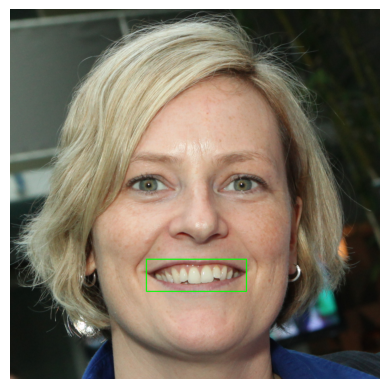

In [47]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for displaying the image

# Load the detector
detector = dlib.get_frontal_face_detector()

# Load the predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# read the image
img = cv2.imread("/content/00018.png")

# Convert image into grayscale
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

# Use detector to find landmarks
faces = detector(gray)

for face in faces:
    # Create landmark object
    landmarks = predictor(image=gray, box=face)

    # The landmarks for the mouth are 48-67
    mouth_points = np.array([[landmarks.part(n).x, landmarks.part(n).y] for n in range(48, 68)])

    # Get the min and max coordinates of the mouth
    x_min = np.min(mouth_points[:, 0])
    y_min = np.min(mouth_points[:, 1])
    x_max = np.max(mouth_points[:, 0])
    y_max = np.max(mouth_points[:, 1])

    # Draw a rectangle around the mouth
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()

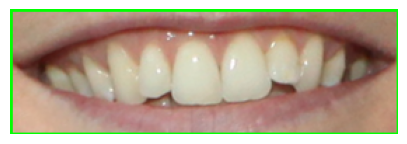

In [51]:
mouth_region = img[y_min:y_max, x_min:x_max]
# Display the cropped mouth region
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(mouth_region, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()